 # Using PointChargeCEF to fit INS of $\mathrm{Er_3Mg_2Sb_3O_{14}}$
By Zhiling Dun, Oct. 2020

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
sys.path.append("/Users/dunzhiling/Documents/Research/Program/Python/PointChargeFit/arXivProgram")
import PointChargeCEF_Oct2020 as CEF


# creast a CEFmodel object named EMSO
EMSO=CEF.CEFmodel('Er3+')

# prepare dataset from files
Exp_1 = np.loadtxt("Exp_Er-tripod_30meV_5K.dat", skiprows=1, usecols=[0,1,2])     #INS data
Exp_2 = np.loadtxt("Exp_Er-tripod_30meV_50K.dat", skiprows=1, usecols=[0,1,2])     #INS data
Exp_3 = np.loadtxt("Exp_Er-tripod_30meV_100K.dat", skiprows=1, usecols=[0,1,2])     #INS data
Exp_4 = np.loadtxt("Exp_Er-tripod_120meV_5K.dat", skiprows=1, usecols=[0,1,2])     #INS data
Exp_5 = np.loadtxt("Exp_Er-tripod_120meV_50K.dat", skiprows=1, usecols=[0,1,2])     #INS data
Exp_6 = np.loadtxt("Exp_Er-tripod_120meV_100K.dat", skiprows=1, usecols=[0,1,2])     #INS data
Exp_sus = np.loadtxt("Exp_Er-tripod_susceptibility.dat", skiprows=1)     #susceptibility data
Exp_MH_5K = np.loadtxt("Exp_Er-tripod_MH.dat", skiprows=1, max_rows=99,  usecols=[1,2])     # MH data
Exp_MH_10K = np.loadtxt("Exp_Er-tripod_MH.dat", skiprows=100, max_rows=99,usecols=[1,2])     # MH data
Exp_MH_40K = np.loadtxt("Exp_Er-tripod_MH.dat", skiprows=200, max_rows=99,usecols=[1,2])     # MH data


#input observed Energy levels, put 0 for uncertain levels. 
EMSO.levels_obs=[0, 0, 6.5, 6.5, 10.5, 10.5, 21.4, 21.4, 50, 50, 61, 61, 65, 65, 67.5, 67.5]  #1
#EMSO.levels_obs=[0, 0, 6.5, 6.5, 10.5, 10.5, 21.4, 21.4, 48.0, 48.0, 51, 51, 65, 65, 67.5, 67.5]  #2

# input 6 inelastic neutron scattering data, one susceptibility data, thre Magnetization file
EMSO.addINSdata(Exp_1, Temperature = 5,   Ei = 30)
EMSO.addINSdata(Exp_2, Temperature = 50,  Ei = 30)
EMSO.addINSdata(Exp_3, Temperature = 100, Ei = 30)
EMSO.addINSdata(Exp_4, Temperature = 5,   Ei = 120, SpecialFWHM=[48,52,2])  # 50 meV exciton is too broad
EMSO.addINSdata(Exp_5, Temperature = 50,  Ei = 120, SpecialFWHM=[48,52,2])
EMSO.addINSdata(Exp_6, Temperature = 100, Ei = 120, SpecialFWHM=[48,52,2])
EMSO.addSUSdata(Exp_sus, B=0.1, Field=[0,0,0]) # powder
EMSO.addMHdata(Exp_MH_5K, Temperature=5, Field=[0,0,0]) # MH 5K
EMSO.addMHdata(Exp_MH_10K, Temperature=10, Field=[0,0,0]) # MH 5K
EMSO.addMHdata(Exp_MH_40K, Temperature=40, Field=[0,0,0]) # MH 5K



## 1.Create a point charge model, 


In [2]:
#  PC_variable stores the names of the PC variables, PC_value stores the numerical values
# then add 8 Point charge in spherical coordination
EMSO.PC_variable = 'R1', 'R2', 'R3', 'Theta2', 'Theta3', 'Phi', 'q1', 'q2', 'q3'
EMSO.clearPC()
EMSO.addPC('R1, 0, 0, q1')
EMSO.addPC('R1, 180, 0, q1')
EMSO.addPC('R2, Theta2, Phi, q2')
EMSO.addPC('R2, Theta2, 360-Phi, q2')
EMSO.addPC('R2, 180-Theta2, 180-Phi, q2')
EMSO.addPC('R2, 180-Theta2, 180+Phi, q2')
EMSO.addPC('R3, 180-Theta3, 0, q3')
EMSO.addPC('R3, Theta3, 180, q3')

## 2.Give proper intial PC values, plot inelastic neutron scattering pattern 

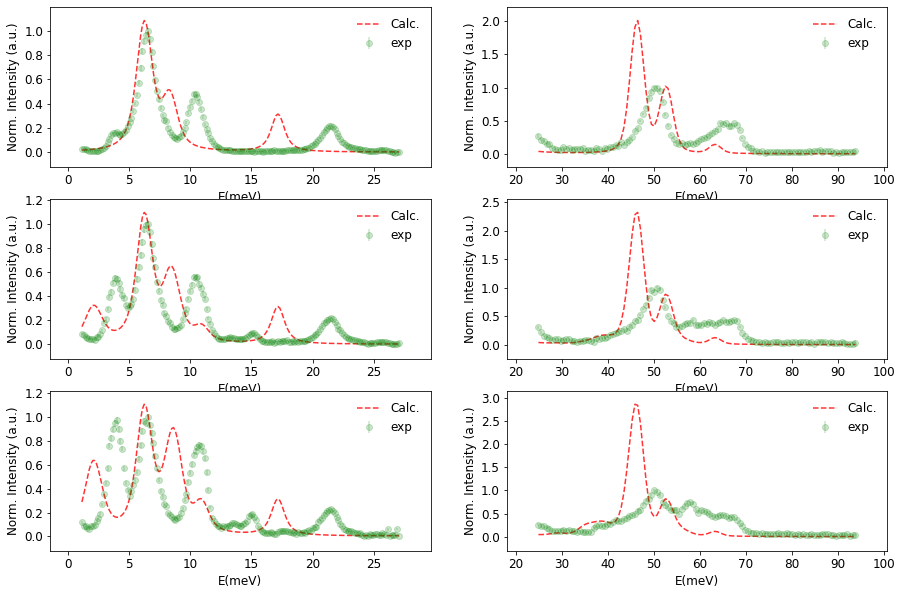

In [3]:
EMSO.PC_value_ini = np.array([1.7, 1.6, 1.5, 80, 75, 60, 0.5, 0.3, 0.2])  # initial values, can test differnt starting value

# define a function to plot 6 INS pattern together
# otherwise Evaluate_pattern, automatically plot a singel INS dataset and return the Chi^2 of calcualted pattern 
def PlotINS(cls, control=False):
    plt.figure(figsize=(15,10))
    for i in range(3):
        plt.subplot(3,2,1+i*2)
        chi,x,y = cls.Evaluate_pattern(dataset = i, Plotcontrol=True, UsePCini=control)
    for i in range(3,6):
        plt.subplot(3,2,i*2-4)
        chi,x,y = cls.Evaluate_pattern(dataset = i, Plotcontrol=True, UsePCini=control)

PlotINS(EMSO, True)


## 3. Grid Search Parameter space with proper steps, and write to file

In [5]:
# for-loops grid search within given Boundary of parameter space
# can first search with large step size, and then narrow down search region

Boundary = [np.linspace(1.6, 1.75, 4),
            np.linspace(1.5, 1.6, 3),
            np.linspace(1.35, 1.55, 5),
            np.linspace(78, 82, 5),
            np.linspace(74, 80, 5),
            np.linspace(60, 60, 1),
            np.linspace(0.5, 0.5, 1),
            np.linspace(0.3, 0.3, 1),
            np.linspace(0.12, 0.12, 1),
           ]

#EMSO.PCsearch(Boundary, "EMSO_PCsearch_3.dat")


'Done!'

   Chi2 ('R1', 'R2', 'R3', 'Theta2', 'Theta3', 'Phi', 'q1', 'q2', 'q3')
[[ 5.866  1.75   1.55   1.5   82.    74.    60.     0.5    0.3    0.2  ]
 [ 6.143  1.8    1.55   1.5   82.    74.    60.     0.5    0.3    0.2  ]
 [ 6.164  1.7    1.55   1.5   82.    74.    60.     0.5    0.3    0.2  ]
 [ 6.403  1.75   1.55   1.5   78.    74.    60.     0.5    0.3    0.2  ]
 [ 6.579  1.7    1.55   1.5   78.    74.    60.     0.5    0.3    0.2  ]
 [ 8.893  1.8    1.55   1.5   78.    74.    60.     0.5    0.3    0.2  ]
 [10.236  1.75   1.55   1.5   74.    78.    60.     0.5    0.3    0.2  ]
 [10.459  1.7    1.55   1.5   74.    78.    60.     0.5    0.3    0.2  ]
 [10.762  1.7    1.55   1.5   74.    82.    60.     0.5    0.3    0.2  ]
 [11.362  1.75   1.55   1.5   74.    74.    60.     0.5    0.3    0.2  ]]


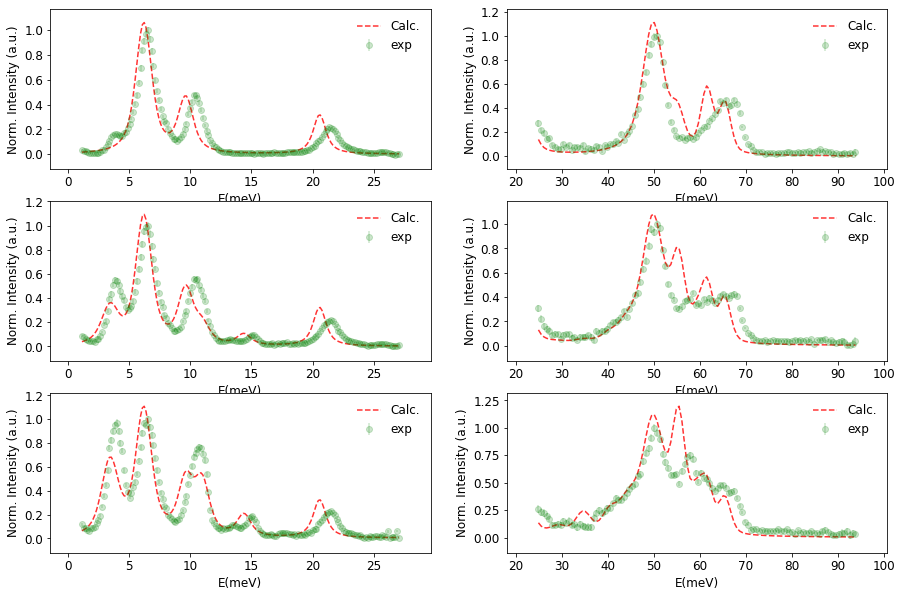

In [4]:
# check several good PC parameters
np.set_printoptions(linewidth=100)
Search=np.loadtxt("EMSO_PCsearch_2.dat",skiprows=1)     
print('   Chi2', EMSO.PC_variable)
print(Search[0:10])

EMSO.PC_value_ini = Search[0][1:]
PlotINS(EMSO, True)

##  4. Point Charge fit

In [5]:
EMSO.PCfit()  # use default method ('Nelder-Mead') to fine mininum, PC_values are automatically updated

# Its possible to chose fit variables, e.g. fix FWHM and q1
#EMSO.PCfit(Fit_variable=['R1', 'R2', 'R3', 'Theta2', 'Theta3', 'Phi', 'q2', 'q3'])

 final_simplex: (array([[ 1.74131762,  1.54988884,  1.48076186, 80.70885331, 75.35475449, 59.9088004 ,  0.51176617,
         0.31100756,  0.18729021,  0.5240168 ],
       [ 1.74131146,  1.54989346,  1.48075457, 80.70918222, 75.35488023, 59.90903995,  0.51176856,
         0.31100356,  0.18728798,  0.52401551],
       [ 1.74130849,  1.54989522,  1.48074776, 80.70912271, 75.35527424, 59.90907209,  0.51176842,
         0.31100338,  0.18728443,  0.52402011],
       [ 1.74130573,  1.54989219,  1.48075611, 80.7092563 , 75.35498413, 59.90904858,  0.5117645 ,
         0.31100294,  0.18728954,  0.52401925],
       [ 1.74130472,  1.54989406,  1.48075081, 80.70928   , 75.3550054 , 59.9088083 ,  0.51176299,
         0.31100476,  0.18728618,  0.52402552],
       [ 1.74130795,  1.54989271,  1.48074975, 80.70921585, 75.35514241, 59.90857185,  0.51176322,
         0.31100387,  0.18728517,  0.52402954],
       [ 1.7413029 ,  1.5498948 ,  1.48074472, 80.70923887, 75.35524721, 59.9084885 ,  0.51175853,
  

[ 0.          0.          6.49275049  6.49275049 10.34758632 10.34758632 21.3924722  21.3924722
 49.81104708 49.81104708 58.49172192 58.49172192 64.60307017 64.60307017 68.06795649 68.06795649]


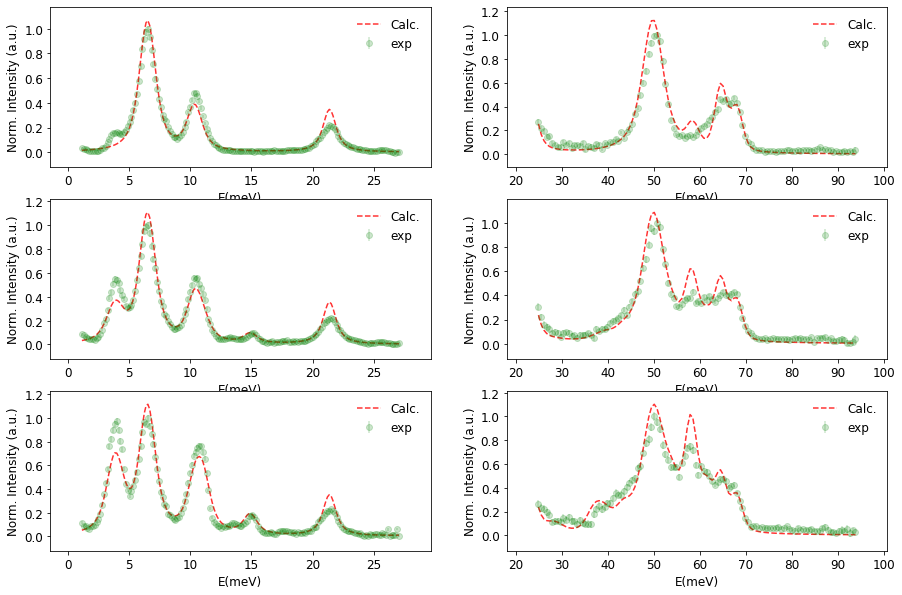

In [6]:
PlotINS(EMSO) # check new fit
print(EMSO.eigenval)

In [8]:
EMSO.writefile("EMSO_PCfit_Solution.dat");  # wirte results to a data file named "EMSO_PCfit1.dat"

## 5. Calculate susceptibility 

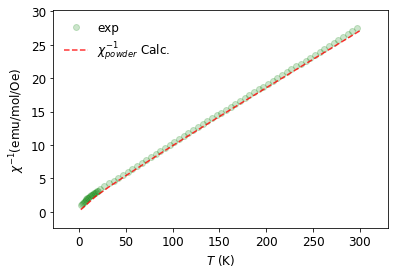

In [5]:
#EMSO.readBkq("EMSO_PCfit_Solution.dat",printcontol=False)

# Power inverse suceptibility without Weiss_field correction
T, inverseChi = EMSO.Powder_InverseSusceptibility(B=0.1, dataset=0,Temperature_range=np.linspace(2,300,20))

(array([ 2. ,  6.5, 11. , 15.5, 20. ]),
 array([1.16217367, 1.7317025 , 2.24552841, 2.71173732, 3.14741733]))

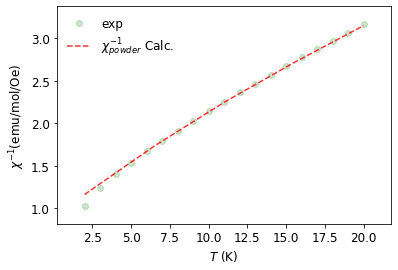

In [6]:
# Power inverse suceptibility with Weiss_field correction
EMSO.Powder_InverseSusceptibility(B=0.1, dataset=0, Temperature_range=np.linspace(2,20,5), Weiss_field = 0.32)

## 6. Calculate  MH-curve



(array([ 0.       ,  0.7368421,  1.4736842,  2.2105263,  2.9473684,  3.6842105,  4.4210526,
         5.1578947,  5.8947368,  6.6315789,  7.3684211,  8.1052632,  8.8421053,  9.5789474,
        10.3157895, 11.0526316, 11.7894737, 12.5263158, 13.2631579, 14.       ]),
 array([0.       , 1.6061885, 2.6644758, 3.2553527, 3.6014862, 3.8318938, 4.0056163, 4.149235 ,
        4.2753272, 4.3902685, 4.4975259, 4.5991084, 4.6962451, 4.7897212, 4.880056 , 4.967601 ,
        5.0525987, 5.1352178, 5.2155775, 5.2937625]))

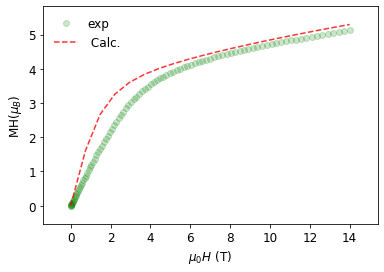

In [11]:
H = np.linspace(0,14,20)
EMSO.Powder_Magnetization(dataset=0, B_range=H, intergration_step=10)

B(T),  M(μB),  T = 5 K
     0.0   0.0000
     1.0   2.0524
     2.0   3.1197
     3.0   3.6208
     4.0   3.9113
     5.0   4.1202
     6.0   4.2923
     7.0   4.4447
     8.0   4.5849
     9.0   4.7166
    10.0   4.8417
    11.0   4.9614
    12.0   5.0764
    13.0   5.1871
    14.0   5.2938
B(T),  M(μB),  T = 10 K
     0.0   0.0000
     1.0   1.2145
     2.0   2.2031
     3.0   2.9129
     4.0   3.4069
     5.0   3.7616
     6.0   4.0313
     7.0   4.2490
     8.0   4.4338
     9.0   4.5967
    10.0   4.7443
    11.0   4.8805
    12.0   5.0079
    13.0   5.1279
    14.0   5.2418
B(T),  M(μB),  T = 40 K
     0.0   0.0000
     1.0   0.3981
     2.0   0.7916
     3.0   1.1764
     4.0   1.5488
     5.0   1.9059
     6.0   2.2453
     7.0   2.5659
     8.0   2.8669
     9.0   3.1482
    10.0   3.4103
    11.0   3.6540
    12.0   3.8803
    13.0   4.0902
    14.0   4.2851


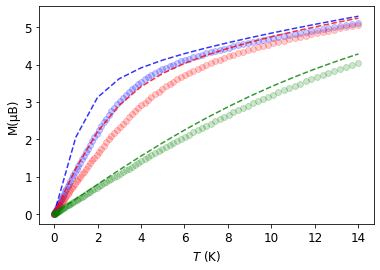

In [7]:
# Plot all curves together
Frontsize = 12
plt.xlabel('$T$ (K)',fontsize=Frontsize)
plt.ylabel('M(μB)',fontsize=Frontsize)
plt.xticks(fontsize=Frontsize)
plt.yticks(fontsize=Frontsize)

H = np.linspace(0,14,15)
color = ['b', 'r', 'g']
for i in range(len(EMSO.EXP_MH)):
    H, M = EMSO.Powder_Magnetization(dataset=i, B_range=H, Plotcontrol=False,  Weiss_field =0, intergration_step=10)
    plt.plot(EMSO.EXP_MH[i].x, EMSO.EXP_MH[i].y, 'o', color=color[i], alpha=0.2, label='exp')
    plt.plot(H, M, '--', color=color[i], alpha=0.8, label='Calc. T=%d K'%EMSO.EXP_MH[i].Temperature)
    print("B(T),  M(μB),  T = %d K" %EMSO.EXP_MH[i].Temperature)
    for i in range(len(H)):
        print("{0:>8.1f}".format(H[i]), "{0:>8.4f}".format(M[i]))
plt.legend(loc='lower right', frameon=False,fontsize=Frontsize)

## 6. Calculate  MH-curve with the Weiss_field Correaction 
 The power-averaging might take quite a long time


B(T),  M(μB),  T = 5 K
     0.0   0.0000
     2.0   2.0642
     4.0   3.4233
     6.0   4.0728
     8.0   4.4549
    10.0   4.7532
    12.0   5.0156
    14.0   5.2555
B(T),  M(μB),  T = 10 K
     0.0   0.0000
     2.0   1.5408
     4.0   2.7982
     6.0   3.6537
     8.0   4.2099
    10.0   4.6031
    12.0   4.9135
    14.0   5.1781
B(T),  M(μB),  T = 40 K
     0.0   0.0000
     2.0   0.6973
     4.0   1.3756
     6.0   2.0183
     8.0   2.6133
    10.0   3.1535
    12.0   3.6370
    14.0   4.0657
Time used =  0:26:41.122537


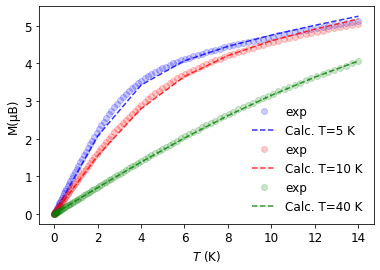

In [12]:
time1=datetime.now()

Frontsize = 12
plt.xlabel('$T$ (K)',fontsize=Frontsize)
plt.ylabel('M(μB)',fontsize=Frontsize)
plt.xticks(fontsize=Frontsize)
plt.yticks(fontsize=Frontsize)

H = np.linspace(0,14,8)
color = ['b', 'r', 'g']
for i in range(len(EMSO.EXP_MH)):
    H, M = EMSO.Powder_Magnetization(dataset=i, B_range=H, Plotcontrol=False,  Weiss_field = 0.32, intergration_step=5)
    plt.plot(EMSO.EXP_MH[i].x, EMSO.EXP_MH[i].y, 'o', color=color[i], alpha=0.2, label='exp')
    plt.plot(H, M, '--', color=color[i], alpha=0.8, label='Calc. T=%d K'%EMSO.EXP_MH[i].Temperature)
    print("B(T),  M(μB),  T = %d K" %EMSO.EXP_MH[i].Temperature)
    for i in range(len(H)):
        print("{0:>8.1f}".format(H[i]), "{0:>8.4f}".format(M[i]))
plt.legend(loc='lower right', frameon=False,fontsize=Frontsize)

print('Time used = ',datetime.now()-time1)


##  Convert Er$^{3+}$ CEF parameters to Ho$^{3+}$ 


In [8]:
CEF.ConvertCEFparamters(EMSO.Bkq, 'Er3+', 'Ho3+')

array([[ 2.00000000e+00,  0.00000000e+00,  1.06957375e-02],
       [ 2.00000000e+00,  1.00000000e+00, -1.44690788e-02],
       [ 2.00000000e+00,  2.00000000e+00,  1.27486809e-01],
       [ 4.00000000e+00,  0.00000000e+00, -9.12052500e-04],
       [ 4.00000000e+00,  1.00000000e+00,  6.34950000e-05],
       [ 4.00000000e+00,  2.00000000e+00, -5.72280000e-04],
       [ 4.00000000e+00,  3.00000000e+00, -9.67431000e-03],
       [ 4.00000000e+00,  4.00000000e+00,  7.40527500e-04],
       [ 6.00000000e+00,  0.00000000e+00, -2.85625000e-06],
       [ 6.00000000e+00,  1.00000000e+00,  8.50000000e-07],
       [ 6.00000000e+00,  2.00000000e+00,  1.15687500e-05],
       [ 6.00000000e+00,  3.00000000e+00,  1.07925000e-04],
       [ 6.00000000e+00,  4.00000000e+00, -1.18687500e-05],
       [ 6.00000000e+00,  5.00000000e+00, -1.59562500e-05],
       [ 6.00000000e+00,  6.00000000e+00, -1.17393750e-04]])